**Importing libraries**

In [1]:
import pandas as pd
import numpy as np

**Loading the data**

In [2]:
ind = pd.read_csv("C:\\Users\\prerna03\\Desktop\\Investment Mgt with Python\\data\\ind30_m_vw_rets.csv", header = 0, index_col=0, parse_dates = True)/100
ind.index = pd.to_datetime(ind.index,  format = "%Y%m").to_period('M') # Converting the index into the datetime format

In [3]:
ind.head(5)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [4]:
ind.columns = ind.columns.str.strip() # removing the extra-space from the column names

### **Creating a module**

Module1 as a .py file, containing all the required functions for the analysis 

In [5]:
import Module1 as m1

In [6]:
%load_ext autoreload
%autoreload 2 # for updating the changes in Module1 automatically to the imported version of the module

### **Computing the Drawdown**

 ***The Drawdown gives the peak-to-trough decline in the returns during last 10 years***

In [7]:
m1.drawdown(ind['Food']['2009':'2018']).head()

,Wealth,Peaks,Drawdown
2009-01,1004.100000,1004.100000,0.000000
2009-02,918.952320,1004.100000,-0.084800
2009-03,953.688718,1004.100000,-0.050205
2009-04,1009.002663,1009.002663,0.000000
2009-05,1056.425788,1056.425788,0.000000


In [8]:
m1.drawdown(ind['Food']['2009':'2018']).plot.line()

In [9]:
m1.drawdown(ind['Food']['2009':'2018']).min() #Computing the minimum drawdown during the last 10 year period

Wealth       918.952320
Peaks       1004.100000
Drawdown      -0.107238
dtype: float64

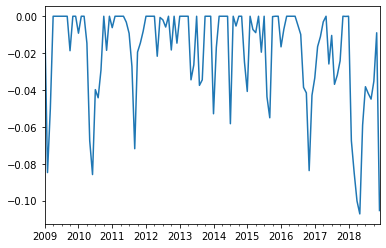

In [10]:
m1.drawdown(ind["Food"]['2009':'2018'])["Drawdown"].plot.line()

In [11]:
m1.drawdown(ind['Food']['2009':'2018']).max() #Computing the maximum drawdown during the last 10 year period

Wealth      3137.268496
Peaks       3137.268496
Drawdown       0.000000
dtype: float64

Finding **Skewness and Kurtosis** of the investment returns

In [12]:
m1.skewness(ind).sort_values().head(5)

Meals   -0.356591
BusEq   -0.212003
Telcm   -0.033990
Smoke    0.003873
Rtail    0.020736
dtype: float64

In [13]:
m1.kurtosis(ind).sort_values().head(5)

Meals    5.844337
Telcm    5.969455
Smoke    6.238037
BusEq    6.239064
Mines    6.378308
dtype: float64

## **Value at Risk (VaR) Computation**

***VaR represents the maximum potential loss on a specific portfolio of financial assets given a specific time horizon and a confidence interval.***

Calculated at 95% Confidence Interval i.e. computing 5% VaR

### Methodologies:

### 1. Historical Approach

***The historical method involves taking empirical return history and ordering it, then assuming that history will repeat itself.***

In [14]:
m1.var_hist(ind['2009':'2018']).head(5)

Food     0.046345
Beer     0.042905
Smoke    0.076965
Games    0.089520
Books    0.087670
dtype: float64

***The main benefit of the Historical method is that it does not require any assumptions about the nature of the distribution of returns.*** 

***The major drawback is that this method implicitly assumes that the shape of future returns will be the same as those of the past.*** 

### 2. Parametric/Gaussian Approach (assumes portfolio returns to be normally distributed)

***The parametric approach or the variance-covariance method requires an assumption to be made about the statistical distribution (normal, log-normal etc.) from which the data is drawn.The normal curve is then generated by a combination of an expected (or average) return and a standard deviation that are assumed to be normally distributed, and by the forecast of the covariance matrix. Parametric approaches are comparable to fitting curves through the data and then reading off the VaR from the fitted curve.***

In [15]:
m1.var_gaussian(ind['2009':'2018']).head(5)

Food     0.044132
Beer     0.045789
Smoke    0.071005
Games    0.100913
Books    0.099586
dtype: float64

***The benefit of parametric or analytic VaR is that relatively little information is needed to compute it.*** 

***The main weakness is that the distribution chosen may not accurately reflect all possible states of the market and may under or overestimate the risk,especially, when using VaR to assess the risk of asymmetric distributions.*** 
***In such cases the higher statistical moments of skewness
and kurtosis which contribute to more extreme losses (fat tails) need to be taken into account.***

### 3. Modified/ Cornish-Fisher Approach

***Cornish-Fisher expansion to estimate quantiles of a non-normal distribution. It is a modification to the Parametric approach and used for asymmetric returns. It helps in transforming a standard Gaussian variable into a non Gaussian random variable***

In [16]:
m1.var_modified(ind['2009':'2018']).head(5)

Food     0.048207
Beer     0.047508
Smoke    0.078347
Games    0.089056
Books    0.077582
dtype: float64

***The benefit of this approach is that it works for non-symmetric returns.***

### Comparison of VaR using different approaches

In [17]:
VaR_list = [m1.var_gaussian(ind['2009':'2018']), m1.var_modified(ind['2009':'2018']), m1.var_hist(ind['2009':'2018'])]
comparison = pd.concat(VaR_list, axis = 1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historic"]

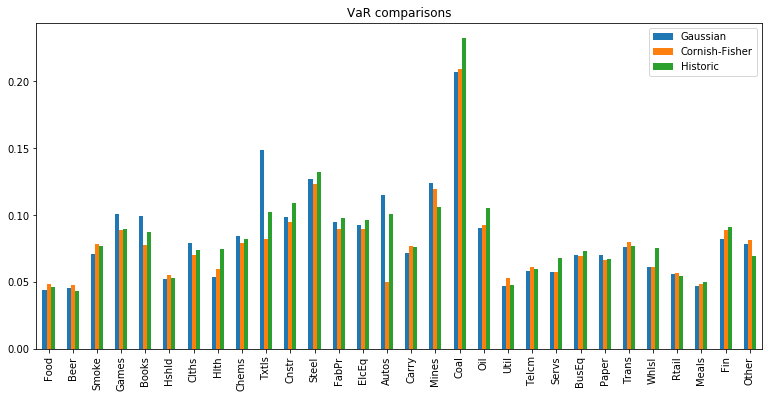

In [18]:
comparison.plot.bar(title="VaR comparisons",figsize=(13,6))

## Calculating ***Conditional VaR*** 

***Condition VaR is the average loss in case the loss exceeds the VaR***

In [19]:
m1.cvar_hist(ind).head(5) # if loss exceeds the 5% VaR the average loss would be 10.36% for Food industry

Food     0.103659
Beer     0.145016
Smoke    0.122454
Games    0.199534
Books    0.157187
dtype: float64

### Computing the **Sharpe Ratio** 

***The Sharpe Ratio computes the performance of an investment compared to a risk-free asset. The higher the ratio the better it is.***

Assuming the Risk-Free rate to be 3.6% or 0.036

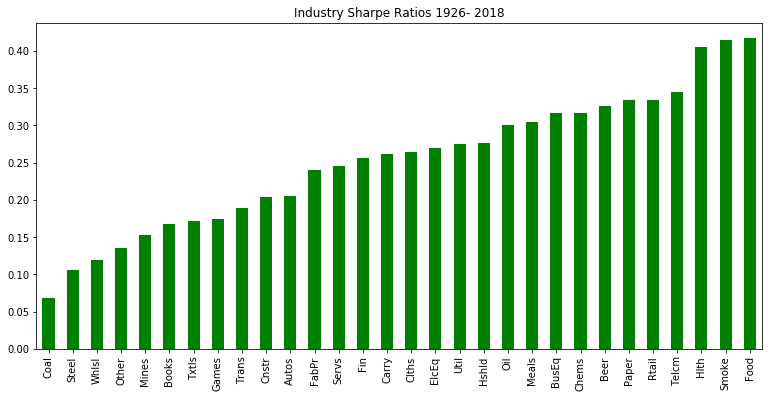

In [20]:
m1.sharpe_ratio(ind, 0.036, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 1926- 2018", color = 'green',figsize=(13,6)) 

In the above chart we can see that the Food industry has the highest Sharpe Ratio. This means in the Food industry the investors can expect more excess return investors for the extra volatility they are exposed to by holding a riskier asset.

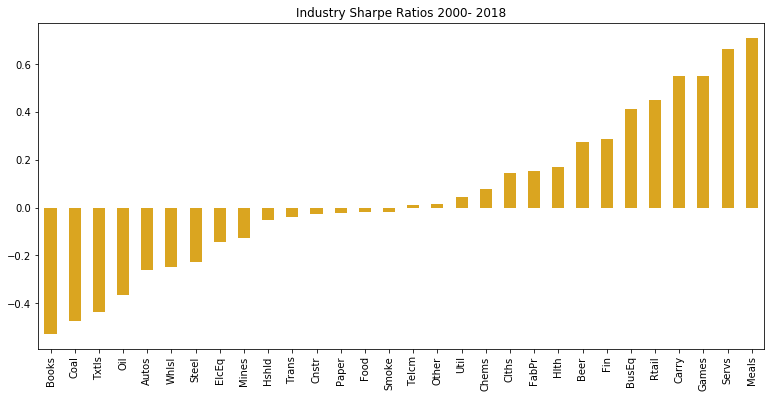

In [21]:
m1.sharpe_ratio(ind["2015":], 0.036, 12).sort_values().plot.bar(title = "Industry Sharpe Ratios 2000- 2018", color = 'goldenrod',figsize=(13,6))

In the above chart we can see that the Meals industry has the highest Sharpe Ratio in the year 2015. This means the investors in this industry can expect more excess return investors for the extra volatility they are exposed to by holding a riskier asset.

## Generating Efficient Frontier

### 1. Case for two asset classes

In [22]:
#classes of assets in consideration
c = ["Rtail", "Fin"] 

In [23]:
#computing expected returns of the 2 assets
Expected_returns = m1.annualize_return(ind['1995':'2000'],12)
Return = Expected_returns[c]

In [24]:
#computing risk/volatility
Cov = ind['1995':'2000'].cov() 
Risk = Cov.loc[c,c]  

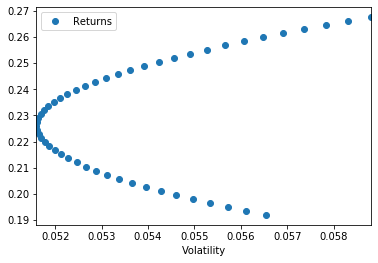

In [25]:
m1.plot_EF2(50, Return, Risk, style = "o")

The uppar part of the Efficient frontier is what we will be interested in as it contains the optimum portfolio weights. This is because in the lower part there will always exist a alternate allocation which will give more return at the same level of risk or lesser risk at the same level of return.

### 2. Case for multi-asset classes

In [26]:
#classes of assets in consideration
m = ["Smoke", "Fin", "Steel", "Meals", "Oil"]

In [27]:
weights = m1.minimize_vol(0.15, Expected_returns[m], Cov.loc[m,m])
weights

array([0.143845  , 0.09534947, 0.10418605, 0.35597655, 0.30064293])

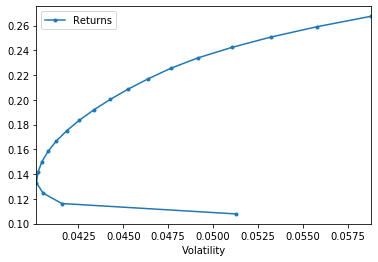

In [28]:
m1.plot_ef_multi(20,  Expected_returns[m], Cov.loc[m,m], style= "o")

The uppar part of the Efficient frontier is what we will be interested in as it contains the optimum portfolio weights. This is because in the lower part there will always exist a alternate allocation which will give more return at the same level of risk or lesser risk at the same level of return.

### Optimal Portfolio Identification

***Identifying the portfolio that provides the combination of the highest return and the lowest risk.*** 

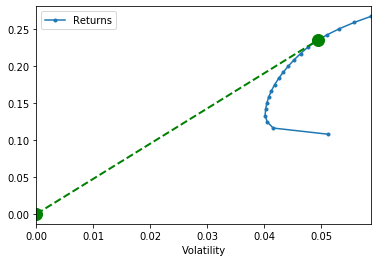

In [29]:
m1.plot_ef(20,  Expected_returns[m], Cov.loc[m,m], show_cml = True)

The optimal portfolio is identified at the intersection of the Capital Market Line and Efficient frontier and at a point where we get the maximum Sharpe Ratio. The Capital market line represents the optimal combinations of risk and return.

In [30]:
m1.msr(0.08,Expected_returns[m], Cov.loc[m,m])

array([4.25133974e-16, 8.54696835e-01, 0.00000000e+00, 0.00000000e+00,
       1.45303165e-01])